In [1]:
import re
import os
import math
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
folders = os.listdir()

In [3]:
folders

['.ipynb_checkpoints',
 'annotated dataset with decision',
 'data_latest_final.csv',
 'Untitled.ipynb']

In [4]:
files=os.listdir('annotated dataset with decision')

In [5]:
files

['ICLR2018-B11bwYgfM-R1_annotated.txt',
 'ICLR2018-B11bwYgfM-R2_annotated.txt',
 'ICLR2018-B11bwYgfM-R3_annotated.txt',
 'ICLR2018-B12Js_yRb-R1_annotated.txt',
 'ICLR2018-B12Js_yRb-R2_annotated.txt',
 'ICLR2018-B12Js_yRb-R3_annotated.txt',
 'ICLR2018-B13EC5u6W-R1_annotated.txt',
 'ICLR2018-B13EC5u6W-R2_annotated.txt',
 'ICLR2018-B13EC5u6W-R3_annotated.txt',
 'ICLR2018-B13njo1R--R1_annotated.txt',
 'ICLR2018-B13njo1R--R2_annotated.txt',
 'ICLR2018-B13njo1R--R3_annotated.txt',
 'ICLR2018-B14TlG-RW-R1_annotated.txt',
 'ICLR2018-B14TlG-RW-R2_annotated.txt',
 'ICLR2018-B14TlG-RW-R3_annotated.txt',
 'ICLR2018-B14uJzW0b-R2_annotated.txt',
 'ICLR2018-B14uJzW0b-R3_annotated.txt',
 'ICLR2018-B16yEqkCZ-R1_annotated - Swati Srivastwa.txt',
 'ICLR2018-B16yEqkCZ-R2_annotated - Swati Srivastwa.txt',
 'ICLR2018-B16yEqkCZ-R3_annotated - Swati Srivastwa.txt',
 'ICLR2018-B16_iGWCW-R1_annotated.txt',
 'ICLR2018-B16_iGWCW-R2_annotated.txt',
 'ICLR2018-B16_iGWCW-R3_annotated.txt',
 'ICLR2018-B17JTOe0--R1_an

In [6]:
sections=['ABS', 'INT', 'RWK', 'PDI', 'DAT', 'MET', 'EXP', 'RES', 'TNF', 'ANA', 'FWK', 'OAL', 'BIB', 'EXT']
aspects=['AP', 'NOV', 'IMP', 'CMP', 'PNF', 'REC', 'EMP', 'SUB', 'CLA']

In [7]:
def calculate_hedge_score(text, hedge_words):
    words = text.split()

    hedge_word_count = 0
    total_word_count = len(words)

    for word in words:
        if word.lower() in hedge_words:
            hedge_word_count += 1

    hedge_score = hedge_word_count / total_word_count

    return hedge_score

In [8]:
files[0]

'ICLR2018-B11bwYgfM-R1_annotated.txt'

In [9]:
with open(os.path.join(folders[1], files[0]), 'r') as f:
    content = f.read()
    matches = re.findall(r'\[(.*?)\]', content)
    #matches = ' '.join(matches)
    print(matches)

['[PDI-NEU', 'null', 'SMY', 'GEN', '[RWK-NEU', 'null', 'SMY', 'GEN', '[MET-NEU', 'null', 'SMY', 'GEN', '[MET-NEU', 'null', 'SMY', 'GEN', '[MET-NEG', 'EMP-NEG', 'CRT', 'MAJ', '[MET-NEG', 'EMP-NEG', 'CRT', 'MAJ', '[OAL-NEG', 'NOV-NEG', 'CRT', 'MAJ', '[CNT', 'null', 'CRT', 'MAJ', '[RWK-NEU', 'null', 'DIS', 'GEN', '[MET-NEG', 'EMP-NEG', 'CRT', 'MAJ', '[OAL-NEG', 'NOV-NEG', 'CRT', 'MAJ', '[OAL-NEG', 'NOV-NEG', 'CRT', 'MAJ']


In [10]:
sec=dict()
asp=dict()
for a in aspects:
    asp[a]=0
for s in sections:
    sec[s]=0
for file in files:
    with open(os.path.join(folders[1], file), 'r') as f:
        content = f.read()
        matches = re.findall(r'\[(.*?)\]', content)
        #matches = ' '.join(matches)
        for match in matches:
            for s in sections:
                if s in match:
                    sec[s]+=1
            for a in aspects:
                if a in match:
                    asp[a]+=1
    #print(file)
    

ICLR2018-BkVsWbbAW-R3_annotated.txt
ICLR2018-BkwHObbRZ-R1_annotated.txt
ICLR2018-BkwHObbRZ-R2_annotated.txt
ICLR2018-BkwHObbRZ-R3_annotated.txt
ICLR2018-BkXmYfbAZ-R2_annotated.txt
ICLR2018-BkXmYfbAZ-R3_annotated.txt
ICLR2018-Bk_fs6gA--R1_annotated.txt
ICLR2018-Bk_fs6gA--R2_annotated.txt
ICLR2018-Bk_fs6gA--R3_annotated.txt
ICLR2018-By-7dz-AZ-R1_annotated - Swati Srivastwa.txt
ICLR2018-By-7dz-AZ-R2_annotated - Swati Srivastwa.txt
ICLR2018-By-7dz-AZ-R3_annotated - Swati Srivastwa.txt
ICLR2018-By-IifZRW-R1_annotated - Swati Srivastwa.txt
ICLR2018-By-IifZRW-R2_annotated - Swati Srivastwa.txt
ICLR2018-By-IifZRW-R3_annotated - Swati Srivastwa.txt
ICLR2018-By03VlJGG-R1_annotated.txt
ICLR2018-By03VlJGG-R2_annotated.txt
ICLR2018-By03VlJGG-R3_annotated.txt
ICLR2018-By0ANxbRW-R1_annotated.txt
ICLR2018-By0ANxbRW-R2_annotated.txt
ICLR2018-By0ANxbRW-R3_annotated.txt
ICLR2018-By3v9k-RZ-R1_annotated.txt
ICLR2018-By3v9k-RZ-R3_annotated.txt
ICLR2018-By3VrbbAb-R1_annotated.txt
ICLR2018-By3VrbbAb-R2_annota

ICLR2018-H1DJFybC--R2_annotated.txt
ICLR2018-H1DJFybC--R3_annotated.txt
ICLR2018-H1DkN7ZCZ-R1_annotated.txt
ICLR2018-H1DkN7ZCZ-R2_annotated.txt
ICLR2018-H1DkN7ZCZ-R3_annotated.txt
ICLR2018-H1Dy---0Z-R1_annotated.txt
ICLR2018-H1Dy---0Z-R2_annotated.txt
ICLR2018-H1Dy---0Z-R3_annotated.txt
ICLR2018-H1eJxngCW-R1_annotated.txt
ICLR2018-H1eJxngCW-R2_annotated.txt
ICLR2018-H1eJxngCW-R3_annotated.txt
ICLR2018-H1K6Tb-AZ-R1_annotated.txt
ICLR2018-H1K6Tb-AZ-R2_annotated.txt
ICLR2018-H1K6Tb-AZ-R3_annotated.txt
ICLR2018-H1kG7GZAW-R1_annotated.txt
ICLR2018-H1kG7GZAW-R2_annotated.txt
ICLR2018-H1kG7GZAW-R3_annotated.txt
ICLR2018-H1kMMmb0--R1_annotated.txt
ICLR2018-H1kMMmb0--R2_annotated.txt
ICLR2018-H1kMMmb0--R3_annotated.txt
ICLR2018-H1l8sz-AW-R1_annotated.txt
ICLR2018-H1l8sz-AW-R2_annotated.txt
ICLR2018-H1l8sz-AW-R3_annotated.txt
ICLR2018-H1LAqMbRW-R1_annotated.txt
ICLR2018-H1LAqMbRW-R2_annotated.txt
ICLR2018-H1LAqMbRW-R3_annotated.txt
ICLR2018-H1mCp-ZRZ-R1_annotated.txt
ICLR2018-H1mCp-ZRZ-R2_annota

ICLR2018-Hkbd5xZRb-R2_annotated.txt
ICLR2018-Hkbd5xZRb-R3_annotated.txt
ICLR2018-HkbJTYyAb-R1_annotated.txt
ICLR2018-HkbJTYyAb-R2_annotated.txt
ICLR2018-HkbJTYyAb-R3_annotated.txt
ICLR2018-HkbmWqxCZ-R1_annotated.txt
ICLR2018-HkbmWqxCZ-R2_annotated.txt
ICLR2018-HkbmWqxCZ-R3_annotated.txt
ICLR2018-Hkc-TeZ0W-R1_annotated.txt
ICLR2018-Hkc-TeZ0W-R3_annotated.txt
ICLR2018-HkCnm-bAb-R1_annotated.txt
ICLR2018-HkCnm-bAb-R2_annotated.txt
ICLR2018-HkCnm-bAb-R3_annotated.txt
ICLR2018-HkCsm6lRb-R1_annotated.txt
ICLR2018-HkCsm6lRb-R3_annotated.txt
ICLR2018-HkcTe-bR--R1_annotated.txt
ICLR2018-HkcTe-bR--R2_annotated.txt
ICLR2018-HkcTe-bR--R3_annotated.txt
ICLR2018-HkCvZXbC--R1_annotated.txt
ICLR2018-HkCvZXbC--R2_annotated.txt
ICLR2018-HkCvZXbC--R3_annotated.txt
ICLR2018-HkCy2uqQM-R1_annotated.txt
ICLR2018-HkCy2uqQM-R2_annotated.txt
ICLR2018-HkCy2uqQM-R3_annotated.txt
ICLR2018-HkeJVllRW-R1_annotated.txt
ICLR2018-HkeJVllRW-R2_annotated.txt
ICLR2018-HkeJVllRW-R3_annotated.txt
ICLR2018-HkepKG-Rb-R1_annota

ICLR2018-HyWrIgW0W-R1_annotated.txt
ICLR2018-HyWrIgW0W-R2_annotated.txt
ICLR2018-HyWrIgW0W-R3_annotated.txt
ICLR2018-HyXBcYg0b-R1_annotated.txt
ICLR2018-HyXBcYg0b-R2_annotated.txt
ICLR2018-HyXBcYg0b-R3_annotated.txt
ICLR2018-Hy_o3x-0b-R1_annotated.txt
ICLR2018-Hy_o3x-0b-R2_annotated.txt
ICLR2018-Hy_o3x-0b-R3_annotated.txt
ICLR2018-SkYXvCR6W-R1_annotated.txt
ICLR2018-SkYXvCR6W-R2_annotated.txt
ICLR2018-SkYXvCR6W-R3_annotated.txt
ICLR2018-Skz_WfbCZ-R1_annotated.txt
ICLR2018-Skz_WfbCZ-R2_annotated.txt
ICLR2018-Skz_WfbCZ-R3_annotated.txt
ICLR2018-Sy-tszZRZ-R1_annotated.txt
ICLR2018-Sy-tszZRZ-R2_annotated.txt
ICLR2018-Sy-tszZRZ-R3_annotated.txt
ICLR2018-Sy1f0e-R--R1_annotated.txt
ICLR2018-Sy1f0e-R--R2_annotated.txt
ICLR2018-Sy1f0e-R--R3_annotated.txt
ICLR2018-Sy1f0e-R--R4_annotated.txt
ICLR2018-Sy21R9JAW-R1_annotated.txt
ICLR2018-Sy21R9JAW-R2_annotated.txt
ICLR2018-Sy21R9JAW-R3_annotated.txt
ICLR2018-Sy3fJXbA--R1_annotated.txt
ICLR2018-Sy3fJXbA--R2_annotated.txt
ICLR2018-Sy3fJXbA--R3_annota

In [11]:
sec

{'ABS': 63,
 'INT': 1059,
 'RWK': 3269,
 'PDI': 2427,
 'DAT': 1471,
 'MET': 10293,
 'EXP': 3544,
 'RES': 2275,
 'TNF': 917,
 'ANA': 1013,
 'FWK': 170,
 'OAL': 1888,
 'BIB': 513,
 'EXT': 385}

In [12]:
asp

{'AP': 3382,
 'NOV': 699,
 'IMP': 722,
 'CMP': 1815,
 'PNF': 955,
 'REC': 312,
 'EMP': 9685,
 'SUB': 1680,
 'CLA': 1275}

In [13]:
sum(asp.values())

20525

In [14]:
for s in sec.keys():
    sec[s]/=29287
for a in asp.keys():
    asp[a]/=20525

In [15]:
sec

{'ABS': 0.0021511250725577903,
 'INT': 0.036159388124423805,
 'RWK': 0.11161948987605422,
 'PDI': 0.08286953255710724,
 'DAT': 0.05022706320210332,
 'MET': 0.35145286304503703,
 'EXP': 0.12100932154198109,
 'RES': 0.07767951650903131,
 'TNF': 0.03131082050056339,
 'ANA': 0.034588725373032404,
 'FWK': 0.005804623211663878,
 'OAL': 0.0644654624918906,
 'BIB': 0.01751630416225629,
 'EXT': 0.013145764332297607}

In [16]:
asp

{'AP': 0.16477466504263094,
 'NOV': 0.03405602923264312,
 'IMP': 0.035176613885505484,
 'CMP': 0.08842874543239951,
 'PNF': 0.04652862362971985,
 'REC': 0.015200974421437271,
 'EMP': 0.47186358099878195,
 'SUB': 0.08185140073081608,
 'CLA': 0.06211936662606577}

In [17]:
sid = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    return compound_score

In [18]:
paper=[]
section_cov=[]
aspect_cov=[]
section_sc=[]
aspect_sc=[]
ratings=[]
confidences=[]
contents=[]
Hedge_scores=[]
sentiment_score=[]
informativeness_score=[]
for file in files:
    with open(os.path.join(folders[1], file), 'r') as f:
        content = f.read()
        matches = re.findall(r'\[(.*?)\]', content)
        matches = ' '.join(matches)
        sect, aspe=0, 0
        sec_sc, asp_sc=0,0
        for s in sections:
            if s in matches:
                sect+=1
                sec_sc+=sec[s]
        for a in aspects:
            if a in matches:
                aspe+=1
                asp_sc+=asp[a]
        sentiment = get_sentiment_score(content)
        sentiment_score.append(sentiment)
        section_cov.append(sect)
        aspect_cov.append(aspe)
        section_sc.append(sec_sc)
        aspect_sc.append(asp_sc)
        paper.append(file[:-4])
        
        rating_pattern = r'rating:\s+(\d+)'
        confidence_pattern = r'confidence:\s+(\d+)'

        rating_match = re.search(rating_pattern, content)
        confidence_match = re.search(confidence_pattern, content)

        rating = rating_match.group(1) if rating_match else None
        confidence = confidence_match.group(1) if confidence_match else None
        
        ratings.append(rating)
        confidences.append(confidence)
        contents.append(content)
        
        processed_text = re.sub(r"[^\w\s]", "", content)
        Hedge_words = ['usually','to some extent','admittedly',"probably", "likely", "perhaps", "possibly", "maybe", "could", "may", "might", "seems", "appears", "potentially", "conceivably", 'presumably', 'supposedly', 'allegedly', 'apparently', 'purportedly', 'hypothetically']
        Hedge_score = calculate_hedge_score(processed_text, Hedge_words)
        Hedge_scores.append(Hedge_score)
        
        inf_sc = (math.e**(asp_sc)+sec_sc+2*abs(int(rating)-5)/10+math.e**abs(sentiment))/((2)*math.e+2)*math.e**Hedge_score
        informativeness_score.append(inf_sc)

In [19]:
set(section_cov)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [20]:
len(sections)

14

In [21]:
set(aspect_cov)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [22]:
len(aspects)

9

In [23]:
set(ratings)

{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}

In [24]:
set(confidences)

{'1', '2', '3', '4', '5'}

In [25]:
d={
    'paper_name':paper,
    'rev_content':contents,
    'sections_covered':section_cov,
    'aspects_covered':aspect_cov,
    'section_score':section_sc,
    'aspect_score':aspect_sc,
    'rating':ratings,
    'confidence_score':confidences,
    'hedge_scores':Hedge_scores,
    'strength_score':sentiment_score,
    'informativeness_score': informativeness_score
}

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(d)

In [28]:
df.head()

,paper_name,rev_content,sections_covered,aspects_covered,section_score,aspect_score,rating,confidence_score,hedge_scores,strength_score,informativeness_score
0,ICLR2018-B11bwYgfM-R1_annotated,"""The idea of using cross-task transfer perform...",4,2,0.610407,0.505920,5,4,0.007092,0.1154,0.459268
1,ICLR2018-B11bwYgfM-R2_annotated,"""This paper proposes a method for multitask an...",5,2,0.683238,0.553715,4,4,0.004320,0.9559,0.705510
2,ICLR2018-B11bwYgfM-R3_annotated,"""The authors propose techniques for multitask ...",8,5,0.895483,0.805652,5,4,0.012615,0.9131,0.766092
3,ICLR2018-B12Js_yRb-R1_annotated,""". Summary: . - This paper proposes a hand-des...",10,8,0.899887,0.965944,6,3,0.001848,0.9828,0.862081
4,ICLR2018-B12Js_yRb-R2_annotated,"""Summary. - This paper mainly focuses on a co...",8,4,0.895483,0.787186,6,3,0.000000,0.9844,0.802641


In [29]:
df.to_csv('data_latest_final2.csv', index=False)

In [ ]:
Hedge_words = ['usually','to some extent','admittedly',"probably", "likely", "perhaps", "possibly", "maybe", "could", "may", "might", "seems", "appears", "potentially", "conceivably", 'presumably', 'supposedly', 'allegedly', 'apparently', 'purportedly', 'hypothetically']

In [ ]:
Hedge_phrases=['it seems', 'i think', 'i believe', 'to some extent', 'in some cases', 'in a way', 'it could be argued','It is likely',
"In my opinion","From my perspective",
"To a certain degree","It's possible that",
"It's worth considering","It may be the case",
"It's not uncommon","It's plausible",
"It's quite possible","It's somewhat",
"It's not unlikely","To some degree",
"It's not entirely clear","It's not out of the question",
"It's open to interpretation","It's not a definitive answer",
"It's not necessarily","It's subject to debate"]

In [ ]:
def calculate_hedge_score(text, hedge_words):
    words = text.split()

    hedge_word_count = 0
    total_word_count = len(words)

    for word in words:
        if word.lower() in hedge_words:
            hedge_word_count += 1

    hedge_score = hedge_word_count / total_word_count

    return hedge_score

In [ ]:
calculate_hedge_score(content, Hedge_words)

In [30]:
max(Hedge_scores)

0.046511627906976744

In [31]:
min(Hedge_scores)

0.0

In [32]:
sum(Hedge_scores)/len(Hedge_scores)

0.0057920621673817185

In [33]:
max(informativeness_score)

0.9644529841906796

In [34]:
min(informativeness_score)

0.4461852915465477

In [35]:
sum(informativeness_score)/len(informativeness_score)

0.766892524699815

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

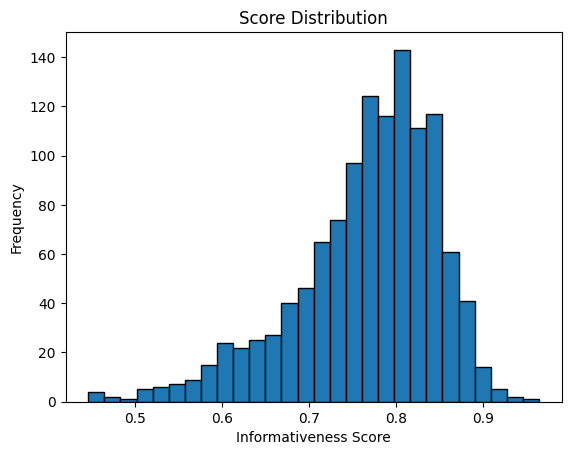

In [37]:
plt.hist(informativeness_score, bins='auto', edgecolor='black')

# Set plot title and labels
plt.title('Score Distribution')
plt.xlabel('Informativeness Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()
